### What are the most demanded skills for the top 3 most popular data roles?


### Methodology

#### 1. clean up skill column
#### 2.calculate skil count based on job_title_short
#### 3. calculate skill percentage 
#### 4. plot final findings 


In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [2]:
df_Pak=df[df["job_country"]== "Pakistan"]

In [3]:
df_skills = df_Pak.explode("job_skills")

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
308,Data Science Engineer (Remote Job for Japan Co...,java
308,Data Science Engineer (Remote Job for Japan Co...,scala
308,Data Science Engineer (Remote Job for Japan Co...,python
308,Data Science Engineer (Remote Job for Japan Co...,sql
943,Senior Consultant - Data Engineer,nosql
...,...,...
784981,Data Engineer - Datastage Consultant,git
785175,Data Scientist,python
785175,Data Scientist,r
785175,Data Scientist,sql


In [10]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False , inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
752,sql,Data Engineer,459
591,python,Data Engineer,392
49,aws,Data Engineer,276
592,python,Data Scientist,244
753,sql,Data Scientist,204
...,...,...,...
312,heroku,Machine Learning Engineer,1
698,shell,Business Analyst,1
699,shell,Cloud Engineer,1
311,heroku,Data Analyst,1


In [15]:
job_titles =df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Engineer', 'Data Scientist', 'Machine Learning Engineer']

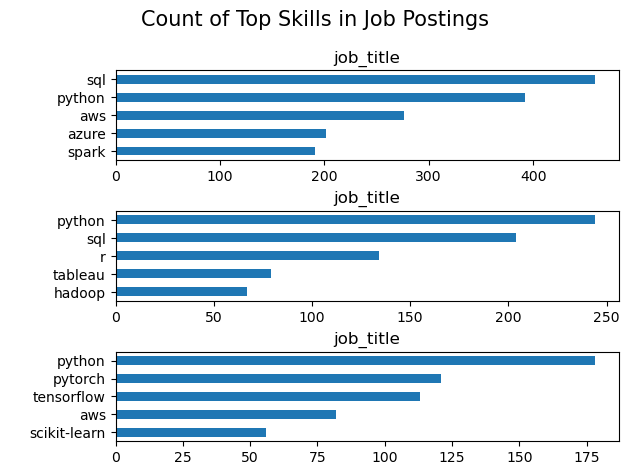

In [17]:
fig, ax =plt.subplots(len(job_titles), 1)

for i , job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills',y="skill_count", ax=ax[i], title='job_title')
    ax[i].invert_yaxis()
    ax[i].set_ylabel(" ")
    ax[i].legend().set_visible(False)
    


fig.suptitle("Count of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5) # fix overlap
plt.show()



In [26]:
df_job_title_count=df_Pak['job_title_short'].value_counts().reset_index(name='jobs_total')

In [27]:
df_skills_perc= pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent']=100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,459,638,71.943574
1,python,Data Engineer,392,638,61.442006
2,aws,Data Engineer,276,638,43.260188
3,python,Data Scientist,244,370,65.945946
4,sql,Data Scientist,204,370,55.135135
...,...,...,...,...,...
869,heroku,Machine Learning Engineer,1,202,0.495050
870,shell,Business Analyst,1,99,1.010101
871,shell,Cloud Engineer,1,43,2.325581
872,heroku,Data Analyst,1,259,0.386100


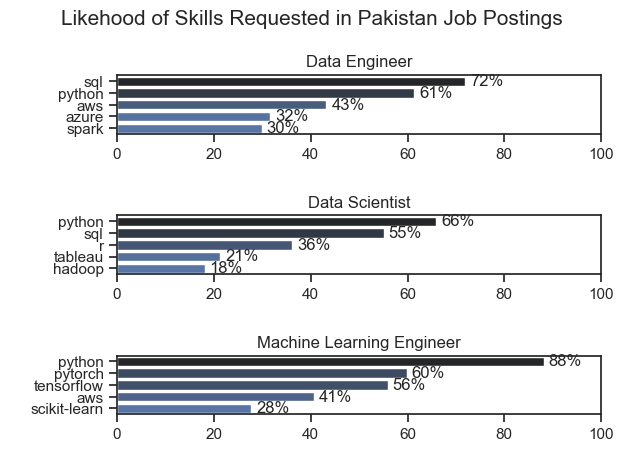

In [50]:
fig, ax =plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i , job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']== job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent' , y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel(" ")
    ax[i].set_xlabel(" ")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100)

    for n, v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v+1 , n, f'{v:.0f}%', va='center')
    
if i  !=len(job_titles) -1:
    ax[i].set_xticks([])

fig.suptitle("Likehood of Skills Requested in Pakistan Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.8) # fix overlap
plt.show()

